# Leitura do dataset mais recente

In [1]:
import pandas as pd
import os
from datetime import datetime


pd.set_option('display.float_format', lambda x: '%.2f' % x)

def get_datetime(dataset_name):
    split_dataset_name = dataset_name.split('_')
    year = int(split_dataset_name[2])
    month = int(split_dataset_name[3])
    day = int(split_dataset_name[4])
    return datetime(year=year, month=month, day=day)

with os.scandir('../datasets/raw/') as dir_entries:
    ### Get the latest produced dataset for analysis.
    filename = dir_entries.__next__().name  # First filename.
    for dir_entry in dir_entries:
        dt_from_filename = get_datetime(filename)
        dt_from_dir_entry = get_datetime(dir_entry.name)
        if dt_from_dir_entry > dt_from_filename:
            filename = dir_entry.name
    ##############################################
data = pd.read_csv(f'../datasets/raw/{filename}')
# data = data.dropna()
# print(filename)
data = data[data['acessos'].notna()]

# Quantidade de publicações por semana do ano

In [2]:
# pd.set_option('display.max_rows', len(data))
data['semana_ano'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%U')
data[['titulo', 'semana_ano']].groupby('semana_ano').count().reset_index().sort_values('titulo')

,semana_ano,titulo
279,2021-10,1
220,2020-01,1
197,2019-28,1
170,2018-51,1
150,2018-30,1
...,...,...
29,2016-10,17
139,2018-19,17
347,2022-26,18
140,2018-20,19


# Soma do total de acessos agrupando as publicações pela semana do ano

In [3]:
# pd.set_option('display.max_rows', len(data))
data['semana_ano'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%U')
data[['acessos', 'semana_ano']].groupby('semana_ano').sum().reset_index().sort_values('acessos')

,semana_ano,acessos
378,2023-06,216.00
373,2023-01,256.00
372,2022-51,372.00
313,2021-44,398.00
337,2022-16,538.00
...,...,...
154,2018-35,75004.00
99,2017-30,87875.00
169,2018-50,93033.00
236,2020-17,98043.00


# Média de acessos agrupando as publicações pela semana do ano

In [4]:
# pd.set_option('display.max_rows', len(data))
data['semana_ano'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%U')
data[['acessos', 'semana_ano']].groupby('semana_ano').mean().reset_index().sort_values('acessos')

,semana_ano,acessos
378,2023-06,108.00
373,2023-01,256.00
337,2022-16,269.00
369,2022-48,316.57
361,2022-40,318.83
...,...,...
151,2018-31,12796.67
169,2018-50,13290.43
99,2017-30,17575.00
155,2018-36,21169.50


# Quantidade de publicações por dia

In [5]:
data['data'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%m-%d')
data[['titulo', 'data']].groupby('data').count().reset_index().sort_values('titulo')

,data,titulo
1331,2023-02-07,1
960,2021-02-08,1
959,2021-02-03,1
482,2018-04-11,1
483,2018-04-12,1
...,...,...
1210,2022-06-24,6
78,2016-01-29,7
129,2016-04-28,8
458,2018-02-27,8


# Soma do total de acessos agrupando as publicações por dia

In [6]:
data['data'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%m-%d')
data[['acessos', 'data']].groupby('data').sum().reset_index().sort_values('acessos')

,data,acessos
1330,2023-02-06,107.00
1331,2023-02-07,109.00
1326,2023-01-31,136.00
1285,2022-11-02,198.00
1297,2022-11-22,213.00
...,...,...
553,2018-09-03,62472.00
831,2020-04-28,70139.00
609,2018-12-21,74979.00
368,2017-07-25,82163.00


# Média de acessos agrupando as publicações por dia

In [7]:
data['data'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%m-%d')
data[['acessos', 'data']].groupby('data').mean().reset_index().sort_values('acessos')

,data,acessos
1330,2023-02-06,107.00
1331,2023-02-07,109.00
1326,2023-01-31,136.00
1288,2022-11-08,166.50
1304,2022-12-01,191.50
...,...,...
609,2018-12-21,37489.50
553,2018-09-03,62472.00
831,2020-04-28,70139.00
368,2017-07-25,82163.00


# Desvio padrão da quantidade de acessos das publicações agrupando-as pela quantidade de imagens

In [8]:
data[['acessos', 'imagens']].groupby('imagens').std().reset_index().sort_values('acessos').dropna()

,imagens,acessos
5,6,441.96
3,4,608.23
4,5,622.29
2,3,672.10
7,8,1064.22
1,2,1365.35
0,1,4709.37


<BarContainer object of 7 artists>

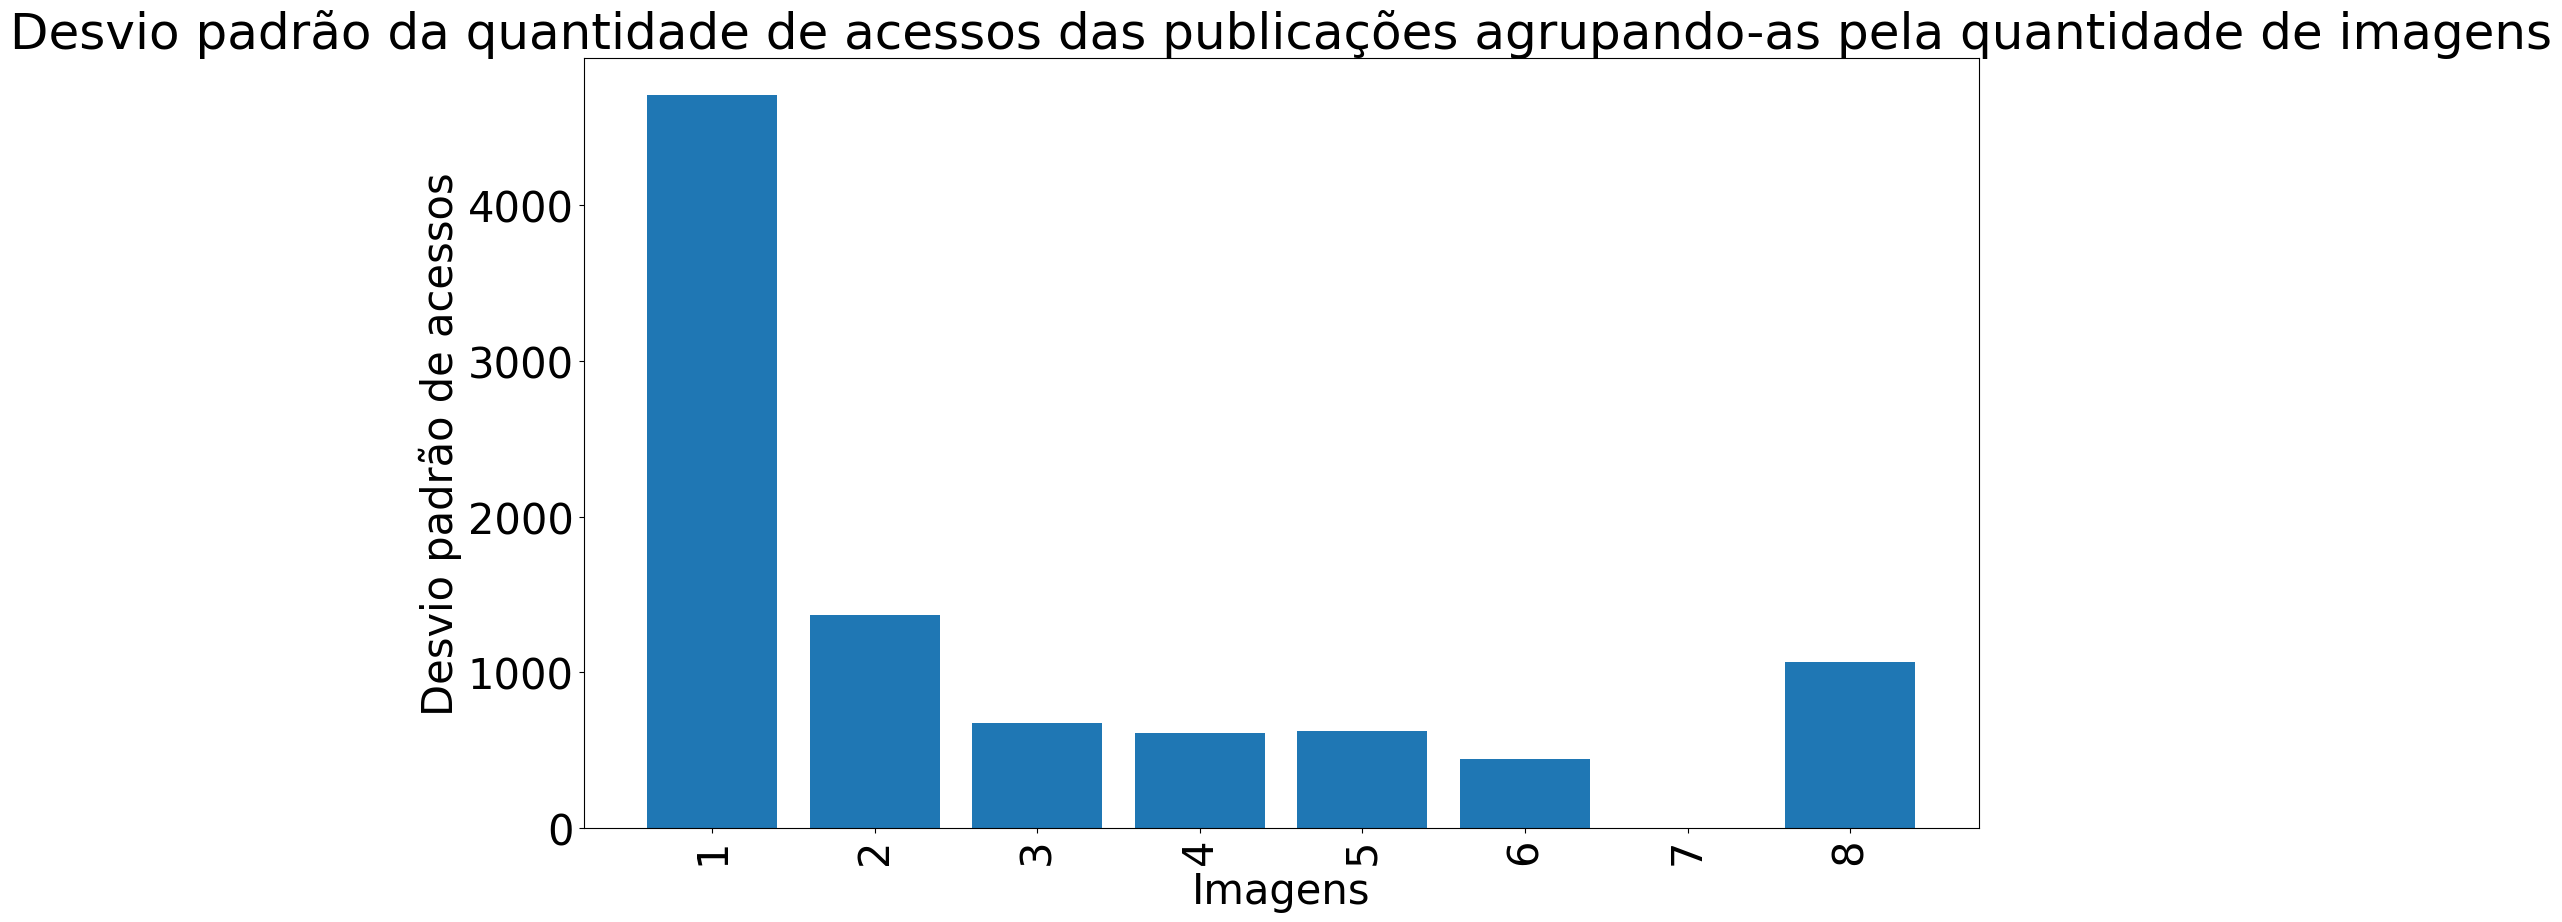

In [9]:
from matplotlib import pyplot

df1 = data[['acessos', 'imagens']].groupby('imagens').std().reset_index().sort_values('acessos').dropna()
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 30})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pela quantidade de imagens')
pyplot.xticks(rotation=90)
pyplot.xlabel('Imagens')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df1['imagens'], df1['acessos'])


# Desvio padrão da quantidade de acessos das publicações agrupando-as pela característica de terem ou não foto de perfil

In [10]:
data[['acessos', 'tem_imagem_perfil']].groupby('tem_imagem_perfil').std().reset_index().sort_values('acessos')

,tem_imagem_perfil,acessos
0,nao,1855.66
1,sim,4322.18


<BarContainer object of 2 artists>

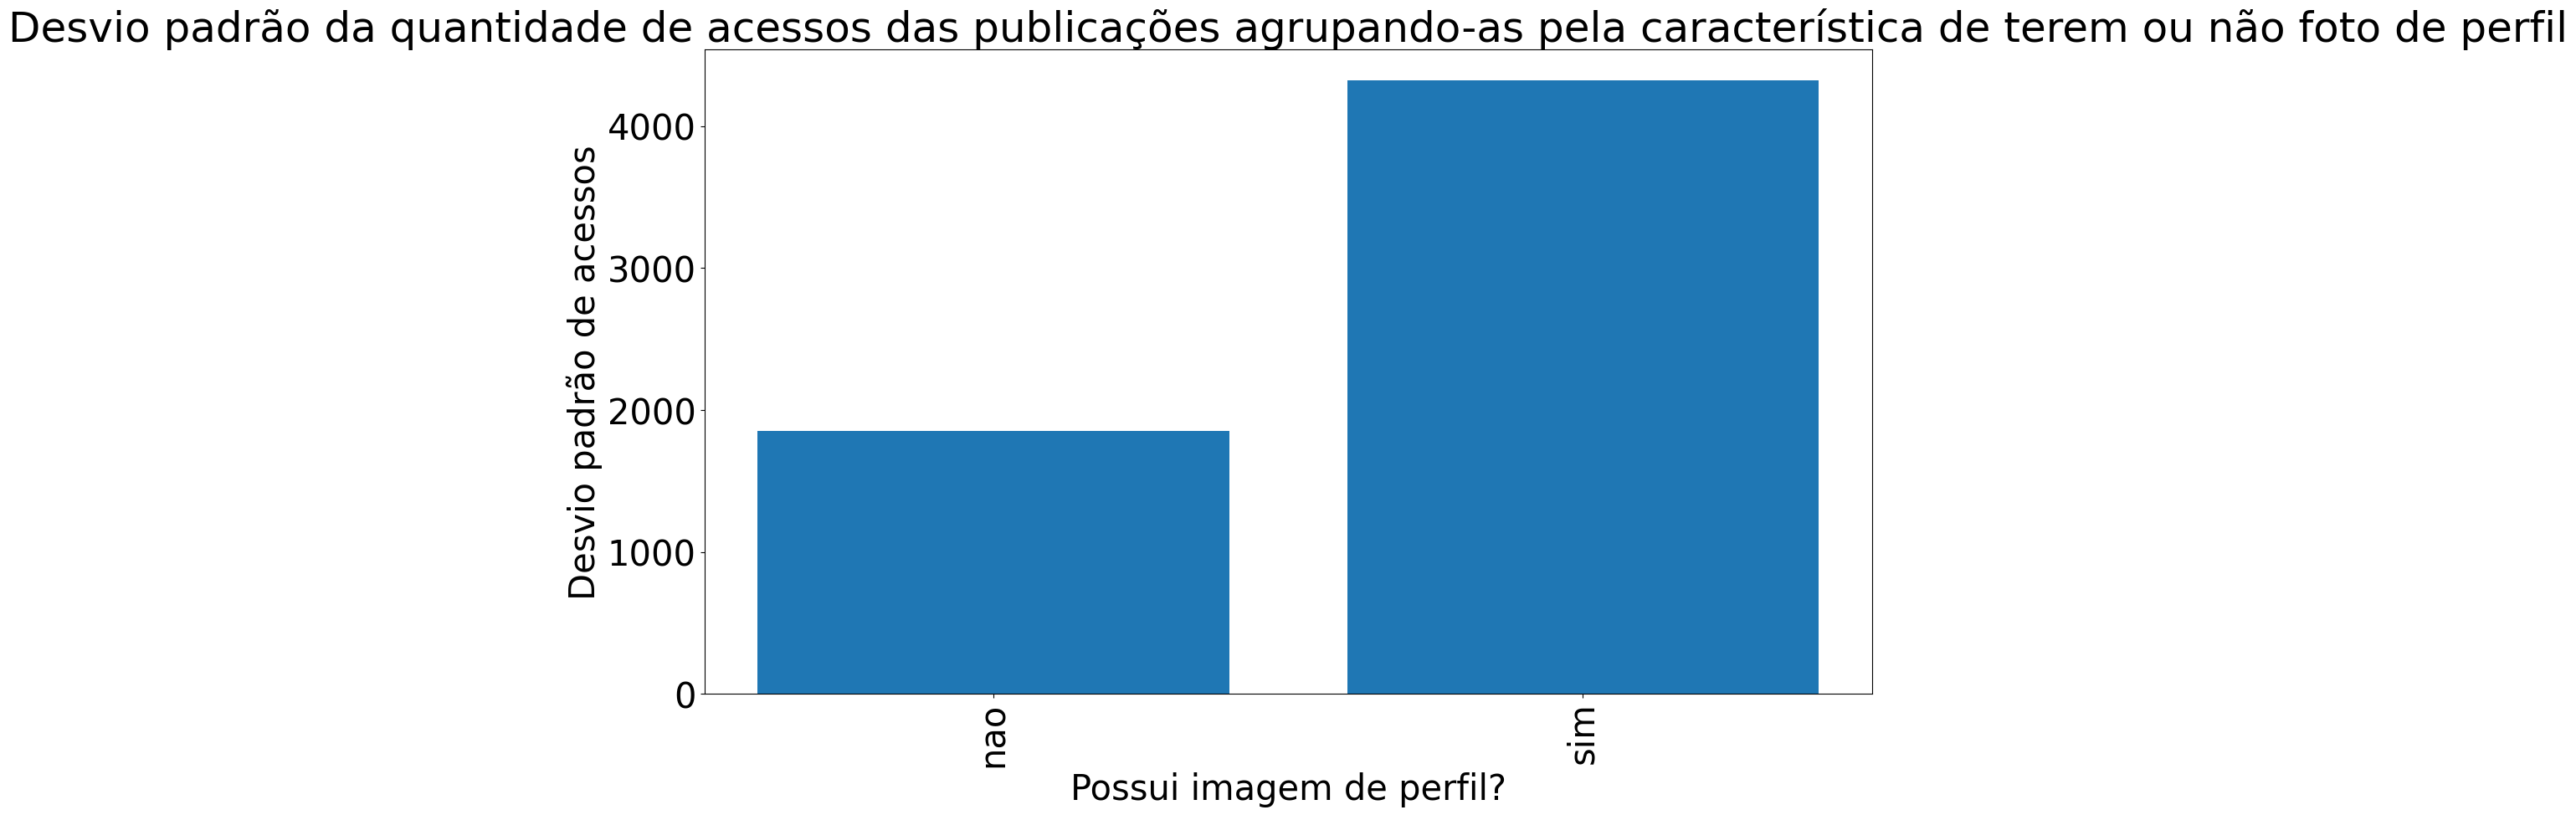

In [11]:
df2 = data[['acessos', 'tem_imagem_perfil']].groupby('tem_imagem_perfil').std().reset_index().sort_values('acessos')
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 30})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pela característica de terem ou não foto de perfil')
pyplot.xticks(rotation=90)
pyplot.xlabel('Possui imagem de perfil?')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df2['tem_imagem_perfil'], df2['acessos'])


# Desvio padrão da quantidade de acessos das publicações agrupando-as pelo dia da semana

In [12]:
data[['acessos', 'dia_semana']].groupby('dia_semana').std().reset_index().sort_values('acessos')

,dia_semana,acessos
0,domingo,593.03
2,quinta,1309.09
3,sabado,1606.27
5,sexta,3995.12
4,segunda,4168.58
6,terca,4965.13
1,quarta,5676.54


<BarContainer object of 7 artists>

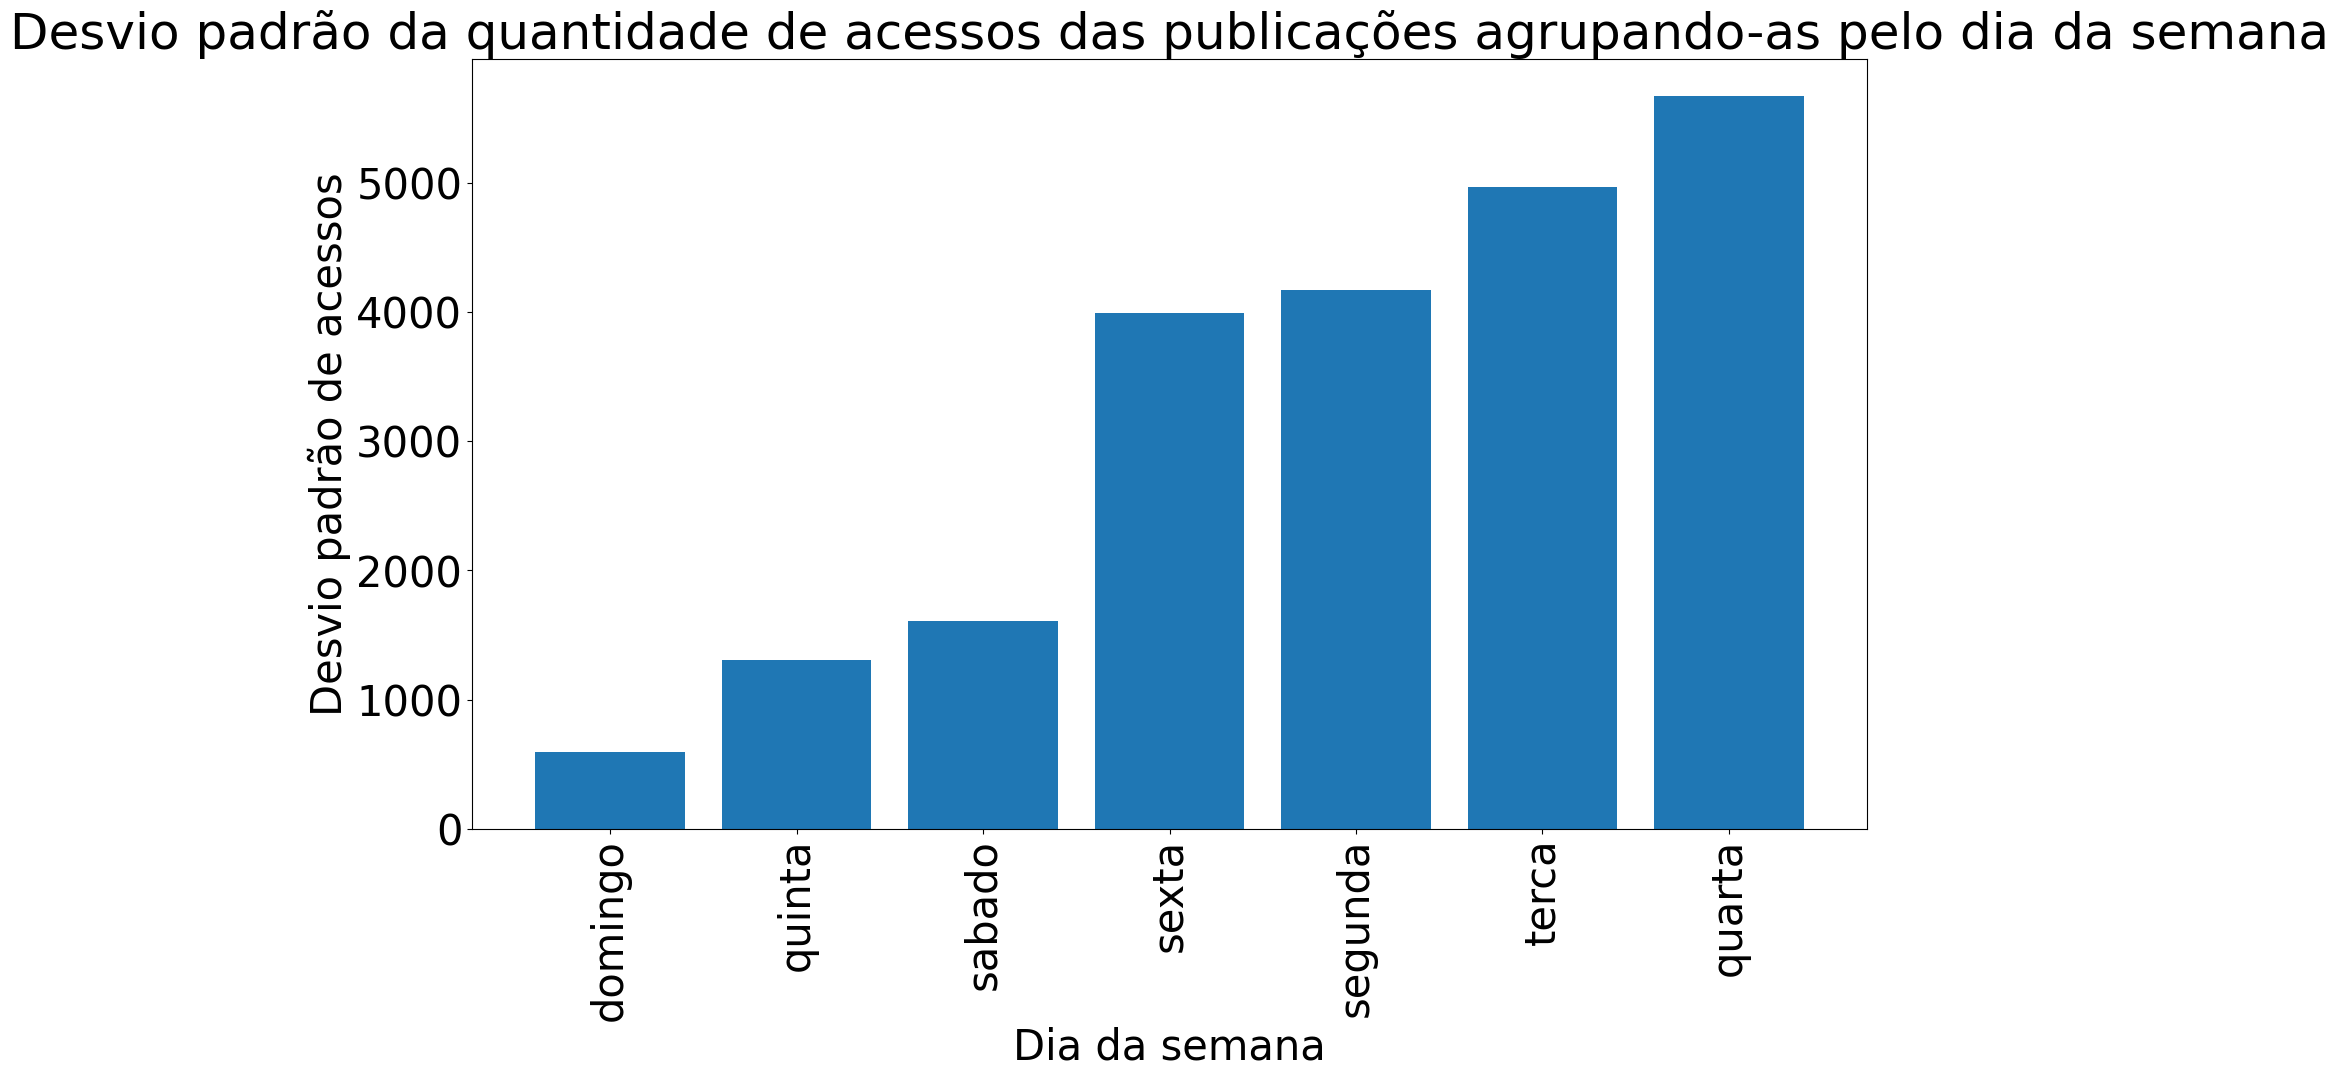

In [13]:
df3 = data[['acessos', 'dia_semana']].groupby('dia_semana').std().reset_index().sort_values('acessos')
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 30})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pelo dia da semana')
pyplot.xticks(rotation=90)
pyplot.xlabel('Dia da semana')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df3['dia_semana'], df3['acessos'])


# Desvio padrão da quantidade de acessos das publicações agrupando-as pelo período da semana

In [14]:
data[['acessos', 'periodo_dia']].groupby('periodo_dia').std().reset_index().sort_values('acessos')

,periodo_dia,acessos
2,tarde,3831.82
1,noite,4190.41
0,manha,5040.99


<BarContainer object of 3 artists>

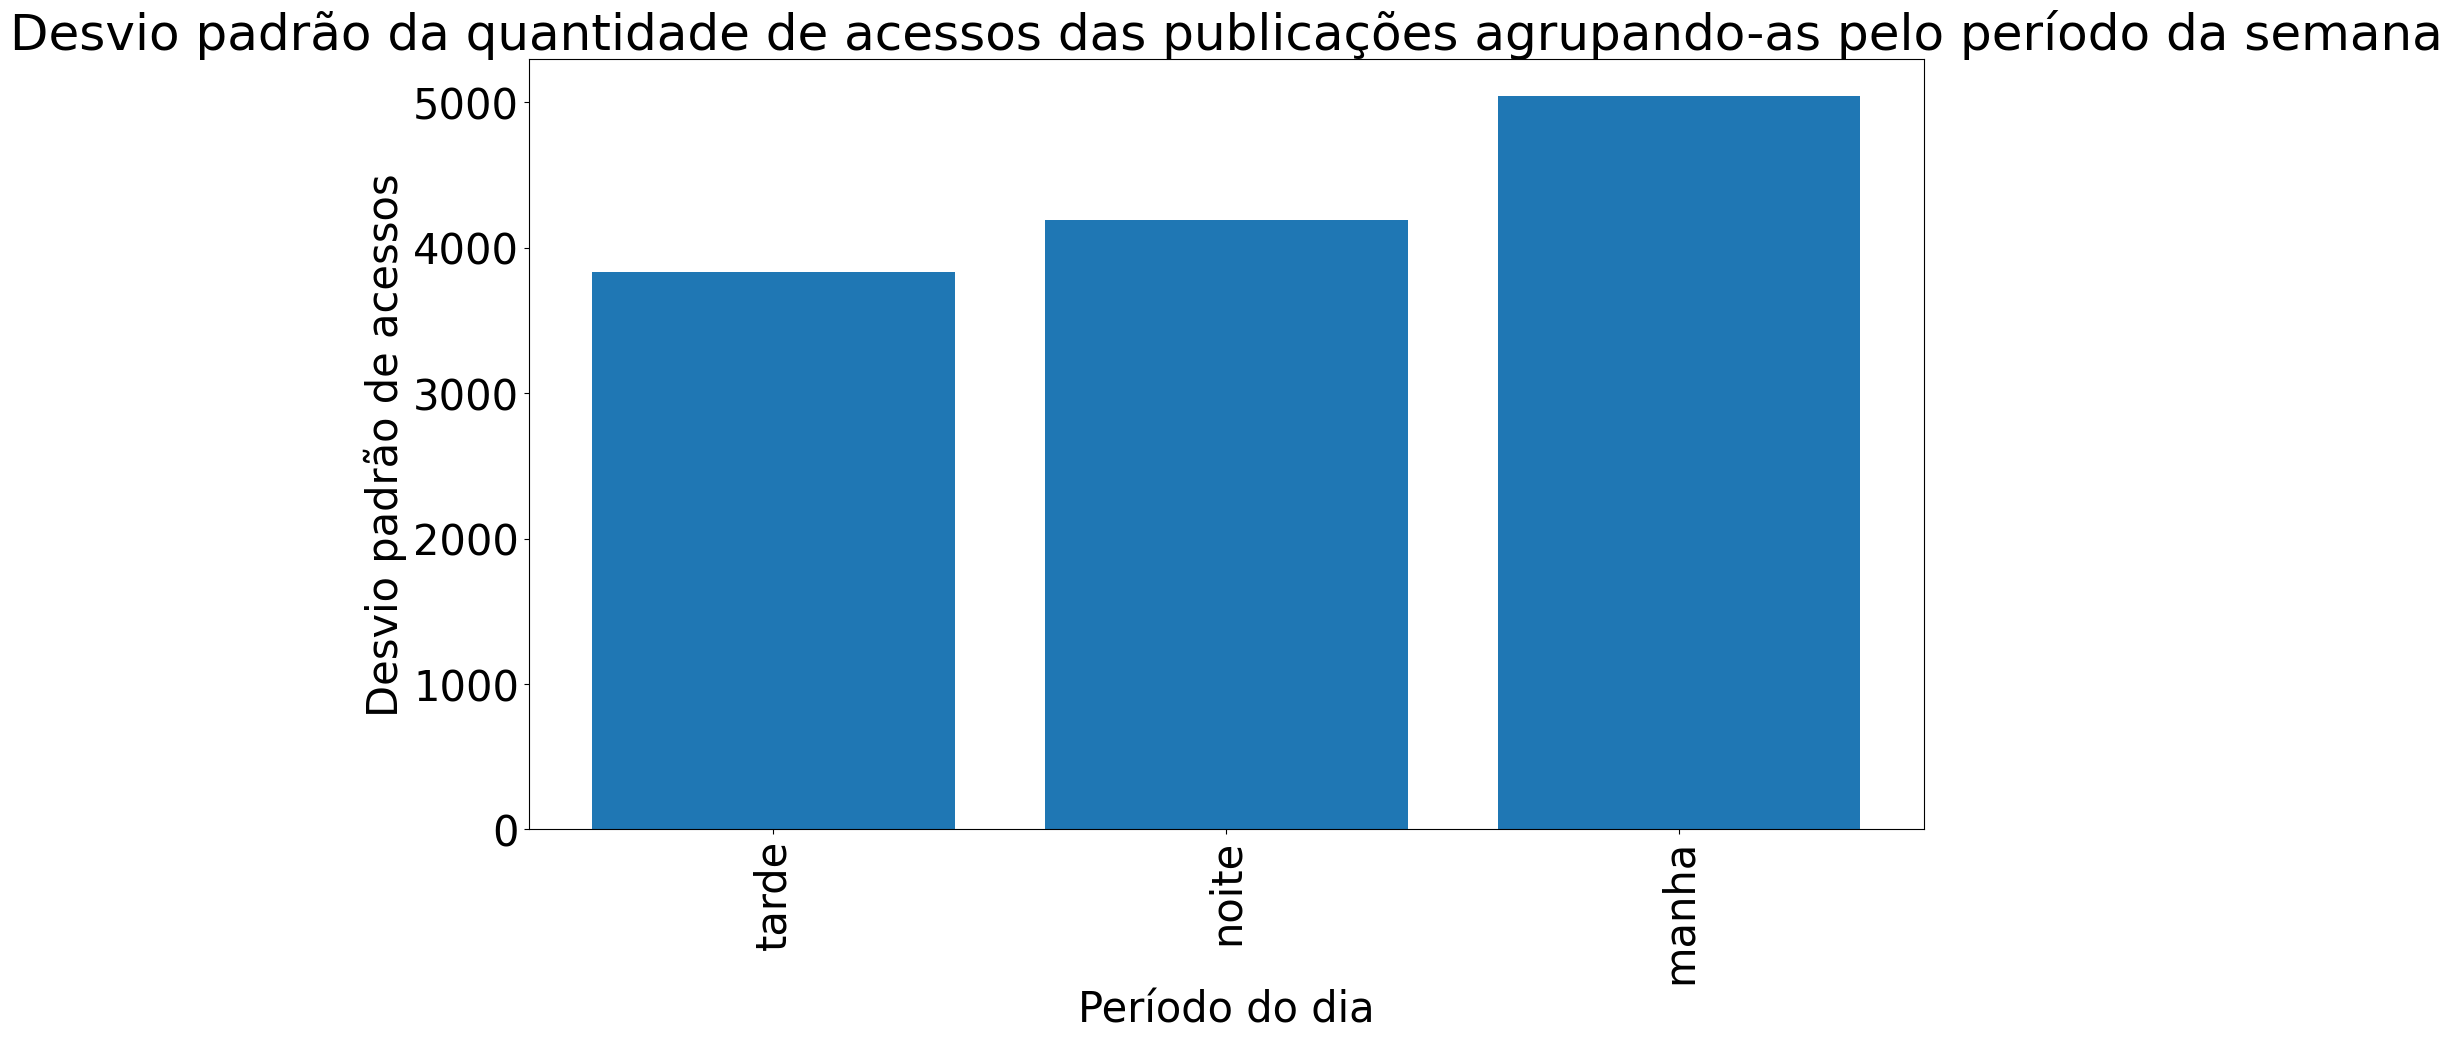

In [15]:
df4 = data[['acessos', 'periodo_dia']].groupby('periodo_dia').std().reset_index().sort_values('acessos')
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 30})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pelo período da semana')
pyplot.xticks(rotation=90)
pyplot.xlabel('Período do dia')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df4['periodo_dia'], df4['acessos'])

# Desvio padrão da quantidade de acessos das publicações agrupando-as pelo dia e período da semana

In [16]:
data[['acessos', 'dia_semana', 'periodo_dia']].groupby(['dia_semana', 'periodo_dia']).std().reset_index().sort_values('acessos')

,dia_semana,periodo_dia,acessos
0,domingo,manha,225.32
4,quarta,noite,529.91
11,sabado,tarde,552.04
10,sabado,noite,610.23
1,domingo,noite,721.25
2,domingo,tarde,795.74
7,quinta,noite,1254.60
19,terca,noite,1257.25
6,quinta,manha,1282.96
8,quinta,tarde,1335.74


<BarContainer object of 21 artists>

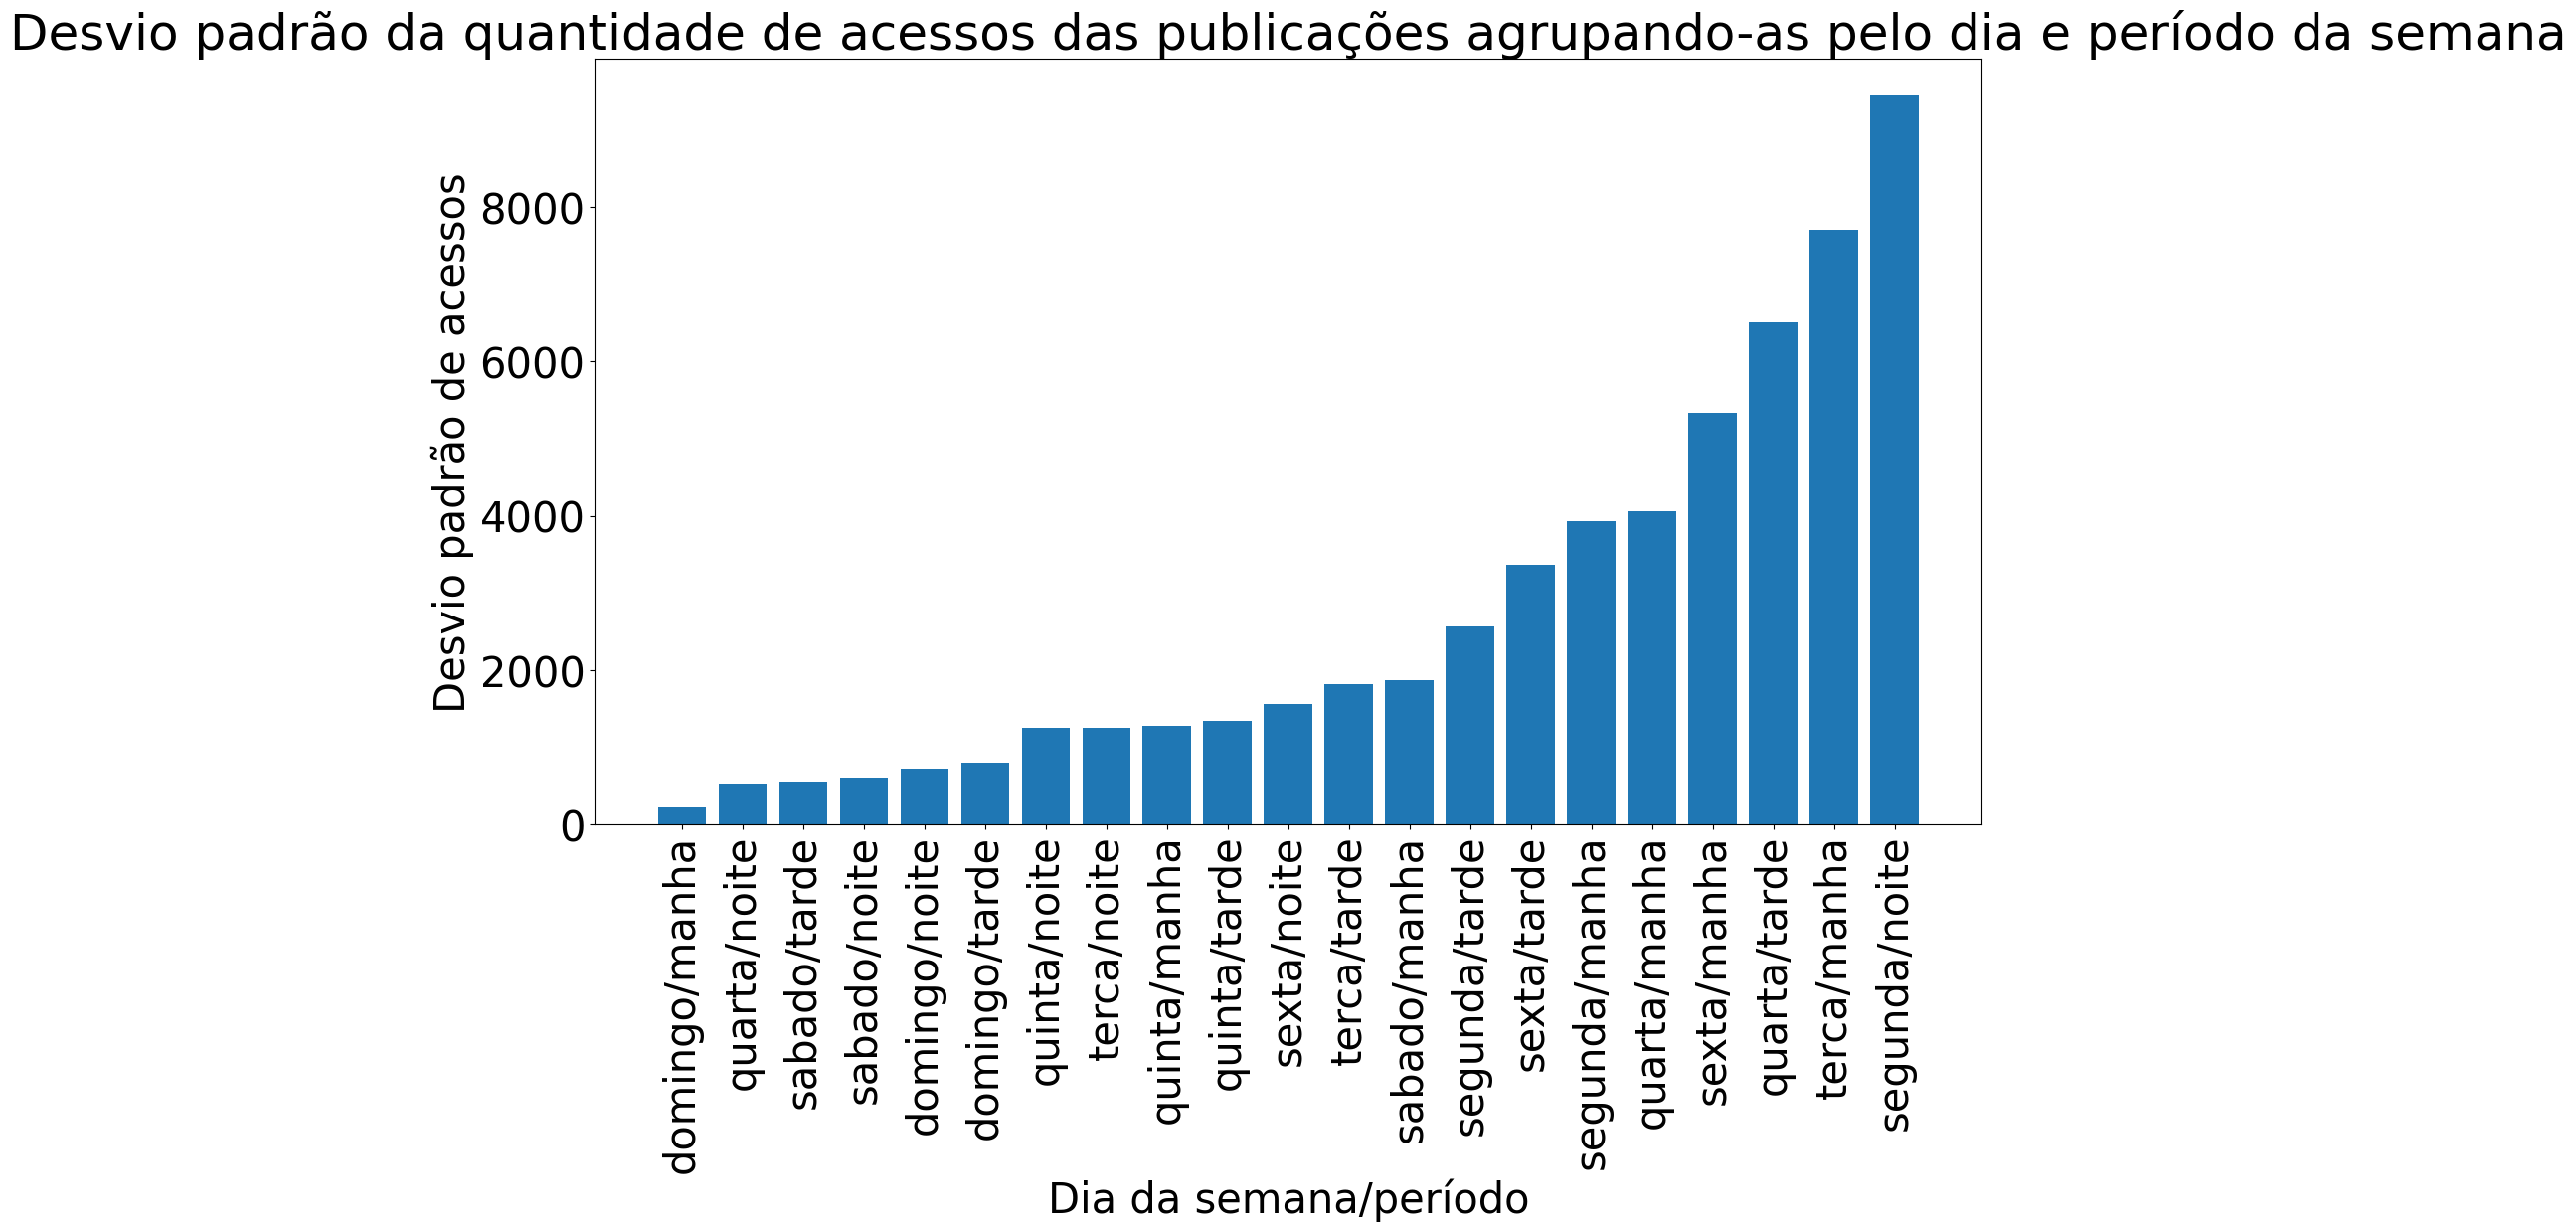

In [17]:
df5 = data[['acessos', 'dia_semana', 'periodo_dia']].groupby(['dia_semana', 'periodo_dia']).std().reset_index().sort_values('acessos')
df5['dia_semana_periodo_dia'] = df5['dia_semana'] + '/' + df5['periodo_dia']
df5.drop(['dia_semana', 'periodo_dia'], axis=1)
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 30})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pelo dia e período da semana')
pyplot.xticks(rotation=90)
pyplot.xlabel('Dia da semana/período')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df5['dia_semana_periodo_dia'], df5['acessos'])


# Desvio padrão da quantidade de acessos das publicações agrupando-as pelo ano

In [18]:
data['ano'] =  pd.to_datetime(data['data_hora']).dt.strftime('%Y')
data[['acessos', 'ano']].groupby('ano').std().reset_index().sort_values('acessos')

,ano,acessos
8,2023,592.25
6,2021,1226.42
1,2016,1586.42
0,2015,1649.68
4,2019,1654.46
7,2022,2541.25
5,2020,5293.94
2,2017,5454.04
3,2018,8209.01


<BarContainer object of 9 artists>

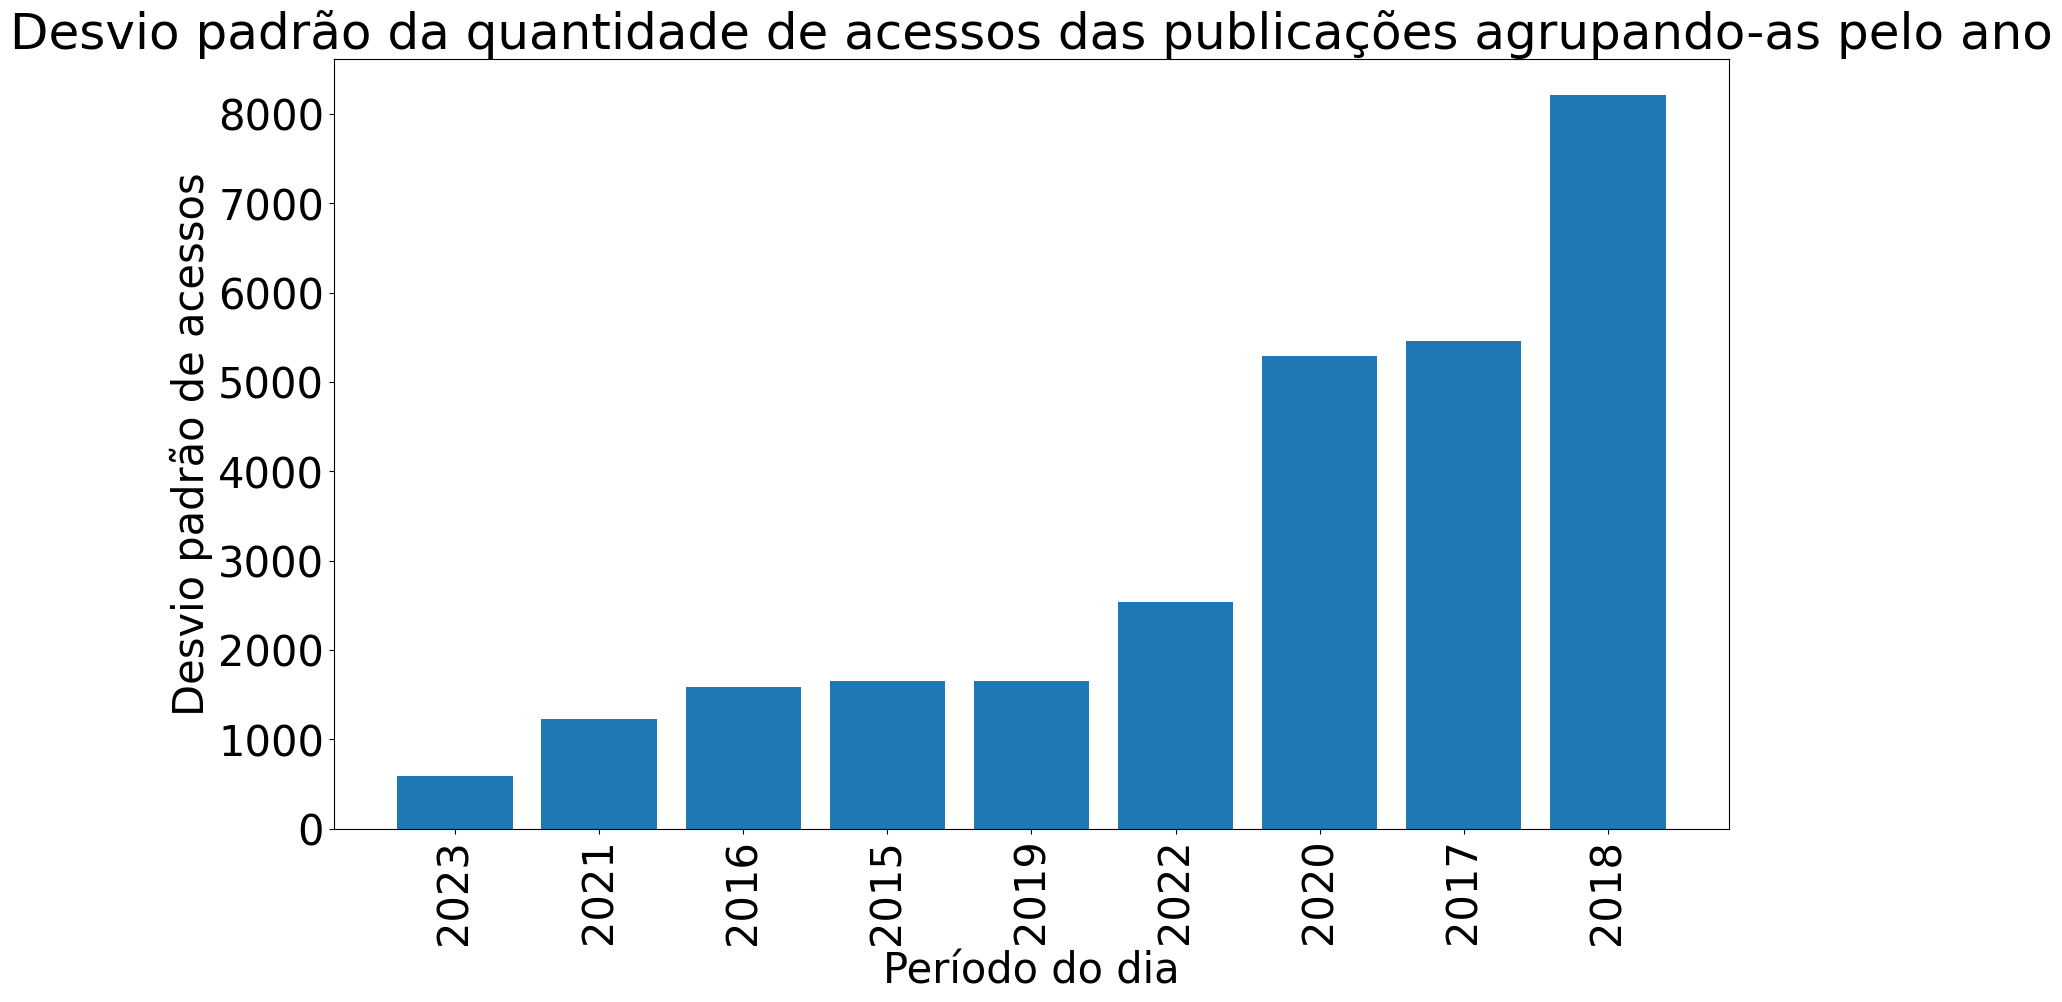

In [19]:
data['ano'] =  pd.to_datetime(data['data_hora']).dt.strftime('%Y')
df6 = data[['acessos', 'ano']].groupby('ano').std().reset_index().sort_values('acessos')
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 30})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pelo ano')
pyplot.xticks(rotation=90)
pyplot.xlabel('Período do dia')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df6['ano'], df6['acessos'])

# Desvio padrão da quantidade de acessos das publicações agrupando-as pelo ano-mes

In [20]:
data['ano_mes'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%m')
data[['acessos', 'ano_mes']].groupby('ano_mes').std().reset_index().sort_values('acessos')

,ano_mes,acessos
85,2022-08,179.41
84,2022-07,210.67
83,2022-06,234.21
73,2021-08,245.08
86,2022-09,256.32
...,...,...
87,2022-10,7889.66
57,2020-04,15058.93
41,2018-12,16093.65
24,2017-07,20865.29


<BarContainer object of 92 artists>

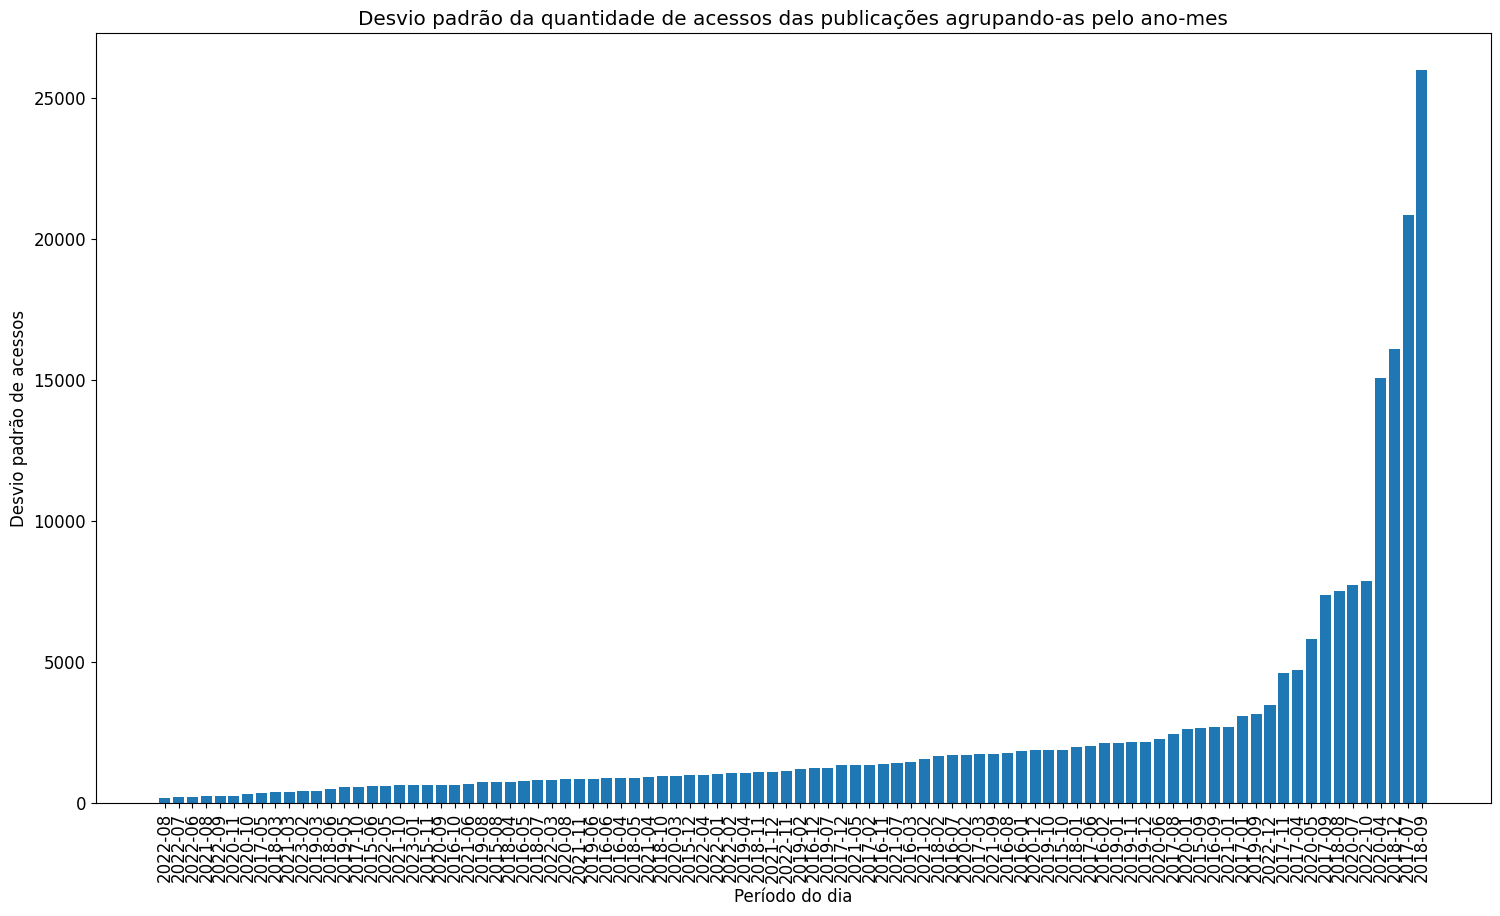

In [21]:
data['ano_mes'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%m')
df7 = data[['acessos', 'ano_mes']].groupby('ano_mes').std().reset_index().sort_values('acessos')
pyplot.rcParams['figure.figsize'] = (18, 10)
pyplot.rcParams.update({'font.size': 12})
pyplot.title('Desvio padrão da quantidade de acessos das publicações agrupando-as pelo ano-mes')
pyplot.xticks(rotation=90)
pyplot.xlabel('Período do dia')
pyplot.ylabel('Desvio padrão de acessos')
pyplot.bar(df7['ano_mes'], df7['acessos'])

# Desvio padrão da quantidade de acessos das publicações agrupando-as pela semana do ano

In [22]:
data['semana_ano'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%U')
data[['acessos', 'semana_ano']].groupby('semana_ano').std().reset_index().sort_values('acessos').dropna()

,semana_ano,acessos
378,2023-06,1.41
112,2017-43,21.21
96,2017-27,25.46
137,2018-17,32.53
355,2022-34,69.85
...,...,...
154,2018-35,22917.48
169,2018-50,23624.60
236,2020-17,32486.36
99,2017-30,36108.36


# Desvio padrão da quantidade de acessos das publicações agrupando-as pelo dia

In [23]:
data['data'] = pd.to_datetime(data['data_hora']).dt.strftime('%Y-%m-%d')
data[['acessos', 'data']].groupby('data').std().reset_index().sort_values('acessos').dropna()

,data,acessos
1041,2021-07-22,1.41
1082,2021-10-18,1.41
931,2020-11-23,2.12
1019,2021-06-10,2.83
1211,2022-06-27,4.24
...,...,...
727,2019-09-03,12353.16
306,2017-04-04,17027.13
389,2017-09-04,22278.10
1275,2022-10-14,23168.63


# Analisando acessos médios por hora

In [24]:
data[data['acessos_medio_hora'] == data['acessos_medio_hora'].max()]

,titulo,descricao,data_hora,dia_semana,periodo_dia,imagens,acessos,acessos_medio_hora,tem_imagem_perfil,semana_ano,data,ano,ano_mes
107,Últimos dias para se inscrever para Pedagogia EaD,Interessados poderão se inscrever até o dia 13...,2022-10-14 13:43:00,sexta,tarde,1,46628.00,16.67,sim,2022-41,2022-10-14,2022,2022-10


In [25]:
data[data['acessos_medio_hora'] == data['acessos_medio_hora'].min()]

,titulo,descricao,data_hora,dia_semana,periodo_dia,imagens,acessos,acessos_medio_hora,tem_imagem_perfil,semana_ano,data,ano,ano_mes
604,Conif realiza live de lançamento de parceria c...,"O evento será realizado no dia 24 de junho, a ...",2021-06-21 11:28:00,segunda,manha,1,210.00,0.01,sim,2021-25,2021-06-21,2021,2021-06
614,IF Goiano realiza aula inaugural de Dinter com...,Evento foi realizado no dia 2 de junho e conto...,2021-06-11 17:24:00,sexta,tarde,1,200.00,0.01,sim,2021-23,2021-06-11,2021,2021-06
800,Mundo do trabalho no pós-pandemia é debatido n...,Especialistas discutem sobre tendências aceler...,2020-10-08 11:58:00,quinta,manha,1,253.00,0.01,sim,2020-40,2020-10-08,2020,2020-10
802,Reflexões sobre formação docente e ensino supe...,Mesa redonda aconteceu na tarde dessa terça-fe...,2020-10-07 09:55:00,quarta,manha,1,291.00,0.01,sim,2020-40,2020-10-07,2020,2020-10
804,Solenidade interativa e inclusiva marca o iníc...,"Evento será realizado até quinta-feira, 8, com...",2020-10-06 10:50:00,terca,manha,1,296.00,0.01,sim,2020-40,2020-10-06,2020,2020-10
939,Diretoria atua no suporte de serviços junto às...,Visitas técnicas visam auxiliar o funcionament...,2020-05-04 17:50:00,segunda,tarde,1,343.00,0.01,sim,2020-18,2020-05-04,2020,2020-05
956,Primeiros textos da Política de Comunicação es...,Toda a comunidade pode contribuir com essa con...,2020-04-09 15:28:00,quinta,tarde,1,365.00,0.01,sim,2020-14,2020-04-09,2020,2020-04
975,Política de Comunicação começa a ser construída,Trabalhos de construção da Política de Comunic...,2020-03-19 16:55:00,quinta,tarde,2,352.00,0.01,sim,2020-11,2020-03-19,2020,2020-03
977,Inscreva-se no Seminário Científico,Interessados em participar devem submeter seus...,2020-03-18 17:59:00,quarta,tarde,1,374.00,0.01,sim,2020-11,2020-03-18,2020,2020-03
1060,Hidrolândia lança livro Ensino de Humanidades ...,Lançamento ocorreu durante a abertura da Seman...,2019-10-30 15:37:00,quarta,tarde,1,406.00,0.01,nao,2019-43,2019-10-30,2019,2019-10


In [26]:
# data[data['acessos_medio_hora'] == data['acessos_medio_hora'].mean()]
data['acessos_medio_hora'].mean()

0.10023291925465841

In [27]:
data[data['acessos_medio_hora'] == data['acessos_medio_hora'].median()]

,titulo,descricao,data_hora,dia_semana,periodo_dia,imagens,acessos,acessos_medio_hora,tem_imagem_perfil,semana_ano,data,ano,ano_mes
143,Divulgado resultado preliminar para preceptore...,A oportunidade é para professores da rede públ...,2022-09-23 15:31:00,sexta,tarde,1,108.00,0.03,sim,2022-38,2022-09-23,2022,2022-09
279,Novo encontro do Conexão Docência ocorre no di...,Novo encontro do Conexão Docência ocorrerá na ...,2022-06-02 09:11:00,quinta,manha,1,209.00,0.03,sim,2022-22,2022-06-02,2022,2022-06
304,Campus Avançado Hidrolândia publica e-book sob...,A obra “A Formação Integrada em Pauta” apresen...,2022-05-13 07:58:00,sexta,manha,1,208.00,0.03,sim,2022-19,2022-05-13,2022,2022-05
310,Divulgado resultado preliminar do Seminário Ci...,Publicação da lista final está prevista para s...,2022-05-10 11:27:00,terca,manha,1,202.00,0.03,sim,2022-19,2022-05-10,2022,2022-05
314,Divulgado Comissão de seleção para tutor PET,Seleção é voltada para docentes do Curso de Ci...,2022-05-09 11:57:00,segunda,manha,1,182.00,0.03,sim,2022-19,2022-05-09,2022,2022-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Discente: veja resultado final do Pipecti de o...,Resultado doPIPECTI para discentes do IF Goian...,2015-09-16 15:45:00,quarta,tarde,1,1723.00,0.03,sim,2015-37,2015-09-16,2015,2015-09
2538,Comissão define planejamento dos JIF em Goiânia,Instituto Federal Goiano (IF Goiano) participa...,2015-09-16 11:14:00,quarta,manha,2,1803.00,0.03,sim,2015-37,2015-09-16,2015,2015-09
2542,I Feira de Ciências e I Seminário de Pesquisa ...,Estão abertas as inscrições para submissão de ...,2015-09-09 14:39:00,quarta,tarde,2,1908.00,0.03,sim,2015-36,2015-09-09,2015,2015-09
2562,Palestra sobre agrocombustíveis abre IV Biopro...,O Câmpus Rio Verde do Instituto Federal Goiano...,2015-08-12 18:17:00,quarta,noite,1,1750.00,0.03,sim,2015-32,2015-08-12,2015,2015-08


In [28]:
data[['imagens', 'acessos_medio_hora']].groupby('imagens').sum().reset_index().sort_values('acessos_medio_hora')

,imagens,acessos_medio_hora
6,7,0.05
7,8,0.16
5,6,0.27
4,5,0.48
3,4,0.73
2,3,1.92
1,2,15.85
0,1,238.74


In [29]:
data[['imagens', 'acessos_medio_hora']].groupby('imagens').mean().reset_index().sort_values('acessos_medio_hora')

,imagens,acessos_medio_hora
5,6,0.04
7,8,0.04
1,2,0.04
2,3,0.05
6,7,0.05
3,4,0.05
4,5,0.06
0,1,0.11


In [30]:
data[['imagens', 'acessos_medio_hora']].groupby('imagens').std().dropna().reset_index().sort_values('acessos_medio_hora')

,imagens,acessos_medio_hora
5,6,0.01
6,8,0.02
3,4,0.03
2,3,0.04
4,5,0.05
1,2,0.06
0,1,0.58


In [31]:
data[['tem_imagem_perfil', 'acessos_medio_hora']].groupby('tem_imagem_perfil').sum().reset_index().sort_values('acessos_medio_hora')

,tem_imagem_perfil,acessos_medio_hora
0,nao,0.64
1,sim,257.56


In [32]:
data[['tem_imagem_perfil', 'acessos_medio_hora']].groupby('tem_imagem_perfil').mean().reset_index().sort_values('acessos_medio_hora')

,tem_imagem_perfil,acessos_medio_hora
0,nao,0.04
1,sim,0.10


In [33]:
data[['tem_imagem_perfil', 'acessos_medio_hora']].groupby('tem_imagem_perfil').std().reset_index().sort_values('acessos_medio_hora')

,tem_imagem_perfil,acessos_medio_hora
0,nao,0.05
1,sim,0.53


In [34]:
data[['dia_semana', 'acessos_medio_hora']].groupby('dia_semana').sum().reset_index().sort_values('acessos_medio_hora')

,dia_semana,acessos_medio_hora
0,domingo,0.33
3,sabado,1.14
2,quinta,38.84
4,segunda,40.41
6,terca,51.91
1,quarta,56.58
5,sexta,68.99


In [35]:
data[['dia_semana', 'acessos_medio_hora']].groupby('dia_semana').mean().reset_index().sort_values('acessos_medio_hora')

,dia_semana,acessos_medio_hora
0,domingo,0.03
3,sabado,0.06
2,quinta,0.08
4,segunda,0.09
6,terca,0.09
1,quarta,0.11
5,sexta,0.13


In [36]:
data[['dia_semana', 'acessos_medio_hora']].groupby('dia_semana').std().reset_index().sort_values('acessos_medio_hora')

,dia_semana,acessos_medio_hora
0,domingo,0.02
3,sabado,0.04
4,segunda,0.29
2,quinta,0.33
6,terca,0.36
1,quarta,0.43
5,sexta,0.94


In [37]:
data[['periodo_dia', 'acessos_medio_hora']].groupby('periodo_dia').sum().reset_index().sort_values('acessos_medio_hora')

,periodo_dia,acessos_medio_hora
1,noite,20.03
2,tarde,115.16
0,manha,123.01


In [38]:
data[['periodo_dia', 'acessos_medio_hora']].groupby('periodo_dia').mean().reset_index().sort_values('acessos_medio_hora')

,periodo_dia,acessos_medio_hora
2,tarde,0.08
1,noite,0.08
0,manha,0.14


In [39]:
data[['periodo_dia', 'acessos_medio_hora']].groupby('periodo_dia').std().reset_index().sort_values('acessos_medio_hora')

,periodo_dia,acessos_medio_hora
1,noite,0.28
2,tarde,0.49
0,manha,0.63


In [40]:
data[['dia_semana', 'periodo_dia', 'acessos_medio_hora']].groupby(['dia_semana', 'periodo_dia']).sum().reset_index().sort_values('acessos_medio_hora')

,dia_semana,periodo_dia,acessos_medio_hora
0,domingo,manha,0.09
10,sabado,noite,0.10
1,domingo,noite,0.11
2,domingo,tarde,0.13
11,sabado,tarde,0.18
9,sabado,manha,0.86
4,quarta,noite,1.57
19,terca,noite,2.63
7,quinta,noite,3.55
16,sexta,noite,4.53


In [41]:
data[['dia_semana', 'periodo_dia', 'acessos_medio_hora']].groupby(['dia_semana', 'periodo_dia']).mean().reset_index().sort_values('acessos_medio_hora')

,dia_semana,periodo_dia,acessos_medio_hora
0,domingo,manha,0.02
2,domingo,tarde,0.03
4,quarta,noite,0.03
11,sabado,tarde,0.04
19,terca,noite,0.05
10,sabado,noite,0.05
8,quinta,tarde,0.05
1,domingo,noite,0.06
20,terca,tarde,0.06
9,sabado,manha,0.07


In [42]:
data[['dia_semana', 'periodo_dia', 'acessos_medio_hora']].groupby(['dia_semana', 'periodo_dia']).std().reset_index().sort_values('acessos_medio_hora')

,dia_semana,periodo_dia,acessos_medio_hora
0,domingo,manha,0.00
2,domingo,tarde,0.02
4,quarta,noite,0.02
10,sabado,noite,0.03
1,domingo,noite,0.04
19,terca,noite,0.04
9,sabado,manha,0.05
11,sabado,tarde,0.05
8,quinta,tarde,0.08
20,terca,tarde,0.08
